 # Assignment 06
 

#### 1. Load training data and plot


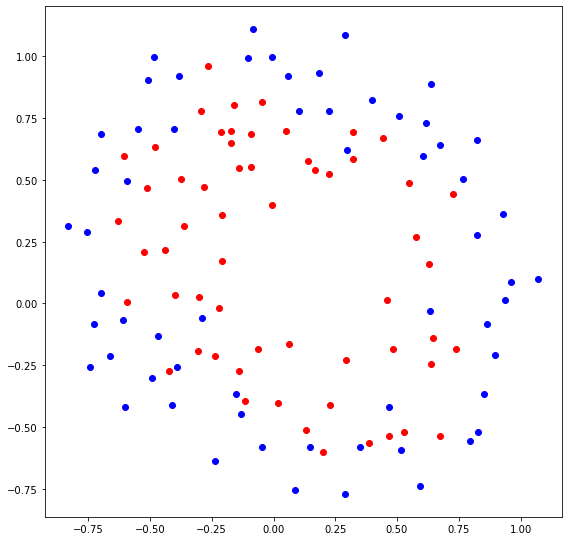

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 2. Generate logistic regression function and derivative

$g(x,y;\theta)=\theta_0+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2+\theta_5xy$

In [2]:
from sympy import *

x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
theta_0 = Symbol('theta_0')
theta_1 = Symbol('theta_1')
theta_2 = Symbol('theta_2')
theta_3 = Symbol('theta_3')
theta_4 = Symbol('theta_4')
theta_5 = Symbol('theta_5')

sym_g = theta_0 + theta_1*x + theta_2*y + theta_3*(x**2) + theta_4*(y**2) + theta_5*x*y
print('g function: ', sym_g)

sym_sig = 1/(1 + exp(-z)); print('sigmoid function: ', sym_sig)

sym_dg_dt0 = diff(sym_g,theta_0)
sym_dg_dt1 = diff(sym_g,theta_1)
sym_dg_dt2 = diff(sym_g,theta_2)
sym_dg_dt3 = diff(sym_g,theta_3)
sym_dg_dt4 = diff(sym_g,theta_4)
sym_dg_dt5 = diff(sym_g,theta_5)


# g(x,y,t0,t1,t2,t3,t4,t5)
g = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_g)

# sigmoid function sig(z)
sig = lambdify([z], sym_sig)

dg_dt0 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt0)
dg_dt1 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt1)
dg_dt2 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt2)
dg_dt3 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt3)
dg_dt4 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt4)
dg_dt5 = lambdify([x,y,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5], sym_dg_dt5)

g function:  theta_0 + theta_1*x + theta_2*y + theta_3*x**2 + theta_4*y**2 + theta_5*x*y
sigmoid function:  1/(1 + exp(-z))


#### 3. Training
with 
- learning rate $\alpha=0.1$
- initial value $\theta_0=\theta_1=\theta_2=\theta_3=\theta_4=\theta_5=1$

In [3]:
t0 = 1; col_t0 = []; col_t0.append(t0)
t1 = 1; col_t1 = []; col_t1.append(t1)
t2 = 1; col_t2 = []; col_t2.append(t2)
t3 = 1; col_t3 = []; col_t3.append(t3)
t4 = 1; col_t4 = []; col_t4.append(t4)
t5 = 1; col_t5 = []; col_t5.append(t5)

col_j = []
col_accurate = []

m = len(pointX); # print(m)
alpha = 1


for iter in range(10000):
    
    tot0 = 0; tot1 = 0; tot2 = 0; tot3 = 0; tot4 = 0; tot5 = 0; totJ = 0

    for i in range(m):
        tot0 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt0(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        tot1 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt1(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        tot2 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt2(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        tot3 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt3(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        tot4 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt4(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        tot5 += (sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)) - label[i])* \
                    dg_dt5(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)
        
        if label[i] == 0:
            totJ += - np.log10(1 - sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)))
            
        if label[i] == 1:
            totJ += - np.log10(sig(g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5)))
            
    c_blue = 0
    c_red = 0
    
    for i in range(m):
        if g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5) > 0:
            if label[i] == 0:
                c_blue += 1     
        if g(pointX[i], pointY[i],t0,t1,t2,t3,t4,t5) < 0:
            if label[i] == 1:
                c_red += 1
    
    col_accurate.append((m-c_blue-c_red)/m)
        
    t0 = t0 - alpha*tot0/m
    t1 = t1 - alpha*tot1/m
    t2 = t2 - alpha*tot2/m
    t3 = t3 - alpha*tot3/m
    t4 = t4 - alpha*tot4/m
    t5 = t5 - alpha*tot5/m
    
    J = totJ/m
    col_j.append(J)
    
    col_t0.append(t0)
    col_t1.append(t1)
    col_t2.append(t2)
    col_t3.append(t3)
    col_t4.append(t4)
    col_t5.append(t5)

print('Training Completed!')

Training Completed!


##### Training output $\theta_0,\theta_1,\theta_2,\theta_3,\theta_4,\theta_5$

In [4]:
print('Theta0 is : %.4f' % t0)
print('Theta1 is : %.4f' % t1)
print('Theta2 is : %.4f' % t2)
print('Theta3 is : %.4f' % t3)
print('Theta4 is : %.4f' % t4)
print('Theta5 is : %.4f' % t5)


Theta0 is : 5.1664
Theta1 is : 3.2452
Theta2 is : 4.1635
Theta3 is : -12.0199
Theta4 is : -11.8152
Theta5 is : -7.5256


##### Training graph

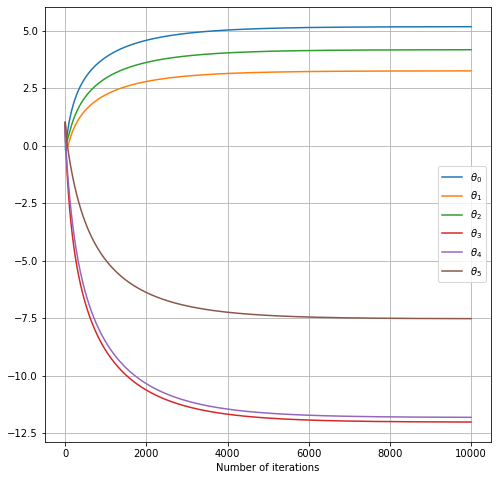

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(col_t0)
plt.plot(col_t1)
plt.plot(col_t2)
plt.plot(col_t3)
plt.plot(col_t4)
plt.plot(col_t5)
plt.xlabel('Number of iterations')
plt.legend(['$\\theta_0$','$\\theta_1$','$\\theta_2$','$\\theta_3$','$\\theta_4$','$\\theta_5$'])
plt.grid()
plt.show()

##### Training error


In [6]:
print('Error is : %.4f' % J)


Error is : 0.1512


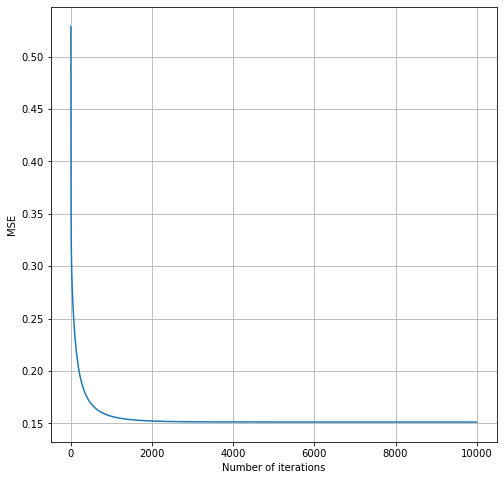

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(col_j)
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.grid()
plt.show()

##### Training accuracy

In [8]:
accurate = (m-c_blue-c_red)/m
print('The final accuracy: %.4f ' % accurate)

The final accuracy: 0.8559 


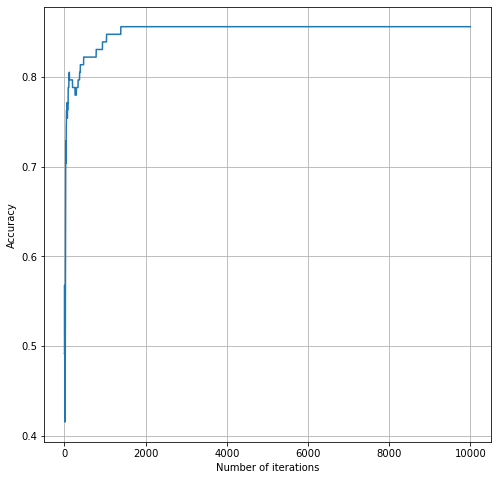

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(col_accurate)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

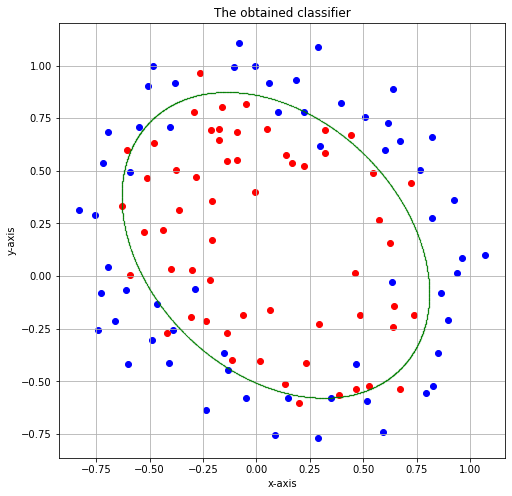

In [10]:
xx = yy = np.arange(-0.9, 1.2, 0.001)
X1 = []; Y1 = [];

for i in xx:
    for j in yy:
        if g(i, j,t0,t1,t2,t3,t4,t5) > -0.008 and g(i, j,t0,t1,t2,t3,t4,t5) < 0.008 :
            X1.append(i)
            Y1.append(j)
            
plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='g', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()